In [1]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/ginn'

import sys
sys.path.insert(1, f'{curr_dir}/fmri')

import pandas as pd
import numpy as np
import pdb
import warnings
import os, argparse
import  matplotlib.pyplot as plt
import seaborn as sns



from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge
import brainiak.funcalign.srm
from scipy import stats
import statsmodels.api as sm
from nilearn import image, datasets, plotting, maskers, signal
import nibabel as nib
import random
import statsmodels.api as sm

import create_movie_rdms
import mvpd_movie_crossval

warnings.filterwarnings("ignore")
print('libraries loaded')

Libraries loaded...
Extracting RDMs for sub: sub-pixar001 0 out of 155
Extracting RDMs for sub: sub-pixar002 1 out of 155
Extracting RDMs for sub: sub-pixar003 2 out of 155
Extracting RDMs for sub: sub-pixar004 3 out of 155
Extracting RDMs for sub: sub-pixar005 4 out of 155
Extracting RDMs for sub: sub-pixar006 5 out of 155
Extracting RDMs for sub: sub-pixar007 6 out of 155
Extracting RDMs for sub: sub-pixar008 7 out of 155
Extracting RDMs for sub: sub-pixar009 8 out of 155
Extracting RDMs for sub: sub-pixar010 9 out of 155
Extracting RDMs for sub: sub-pixar011 10 out of 155
Extracting RDMs for sub: sub-pixar012 11 out of 155
Extracting RDMs for sub: sub-pixar013 12 out of 155
Extracting RDMs for sub: sub-pixar014 13 out of 155
Extracting RDMs for sub: sub-pixar015 14 out of 155
Extracting RDMs for sub: sub-pixar016 15 out of 155
Extracting RDMs for sub: sub-pixar017 16 out of 155
Extracting RDMs for sub: sub-pixar018 17 out of 155
Extracting RDMs for sub: sub-pixar019 18 out of 155
Ex

In [ ]:
human_predictor = '/lab_data/behrmannlab/vlad/ginn/fmri/hbn/derivatives/group_func'
model_predictor = '/lab_data/behrmannlab/vlad/ginn/modelling/model_ts'

exp_dir= f'ginn/fmri/pixar'
study_dir = f'/lab_data/behrmannlab/scratch/vlad/{exp_dir}'
subj_dir=f'{study_dir}/derivatives/preprocessed_data'
roi_dir = f'{study_dir}/derivatives/rois'

subj = 'sub-pixar135'
#subj = 'sub-NDAREG930XPP'
file_suf = 'partly_cloudy'
clf = Ridge()


file_suf = 'pixar_run-001_swrf'
#file_suf = 'movieDM'

all_subs = pd.read_csv(f'{curr_dir}/fmri/pixar-sub-info.csv')
#all_subs = pd.read_csv(f'{curr_dir}/fmri/HBN-Site-CBIC.csv')
#all_subs['participant_id'] = 'sub-' + all_subs['participant_id'].astype(str)

fix_tr = 0

In [ ]:
'''Select adult data'''

curr_subs = mvpd_movie_crossval.get_existing_files(all_subs)
curr_subs['age'] = curr_subs['age'].apply(np.floor)
curr_subs['age'][curr_subs['age']>=18] = 18
curr_subs = curr_subs.drop_duplicates(subset ="sub",)
curr_subs = curr_subs.reset_index()
curr_subs = curr_subs[curr_subs['age']==18]




In [ ]:
whole_brain_mask = image.load_img('/opt/fsl/6.0.3/data/standard/MNI152_T1_2mm_brain_mask.nii.gz')
#sub_vol = image.clean_img(image.load_img(f'{subj_dir}/{subj}/{subj}_task-movieDM_bold.nii.gz'),detrend=True,standardize=True)
#mean_func = image.clean_img(image.load_img(f'{human_predictor}/mean_task-movieDM_bold_18.nii.gz'),detrend=True,standardize=True)

bold_vol = image.load_img(f'{subj_dir}/{subj}/{subj}_task-pixar_run-001_swrf_bold.nii.gz')
whole_brain_mask = image.load_img(f'{subj_dir}/{subj}/{subj}_analysis_mask.nii.gz')


first_volume = image.index_img(bold_vol, 0)
#first_mean_vol = image.index_img(mean_func, 0)


In [ ]:
'''load rois'''
lo_roi = image.binarize_img(image.load_img(f'{roi_dir}/rLO.nii.gz'))
ffa_roi = image.binarize_img(image.load_img(f'{roi_dir}/rFFA.nii.gz'))
a1_roi = image.binarize_img(image.load_img(f'{roi_dir}/lA1.nii.gz'))



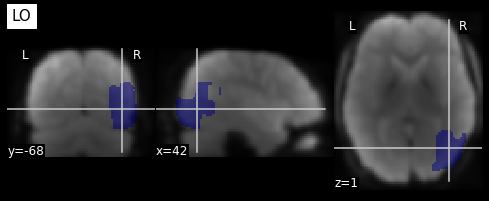

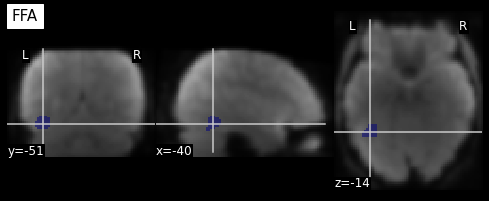

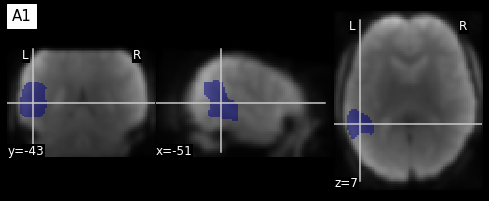

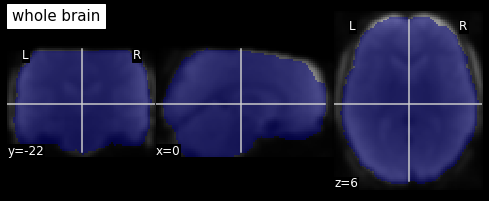

In [ ]:
'''plot ROIs'''
plotting.plot_roi(lo_roi, first_volume, title='LO', alpha=0.5)
plotting.plot_roi(ffa_roi, first_volume, title='FFA',alpha=0.5)
plotting.plot_roi(a1_roi, first_volume, title='A1',alpha=0.5)
plotting.plot_roi(whole_brain_mask, first_volume, title='whole brain',alpha=0.5)

In [ ]:
masker = maskers.NiftiMasker(mask_img=ffa_roi) 
masker.fit(bold_vol)
roi_ts = masker.transform(bold_vol)

In [ ]:
roi_ts.shape

(168, 278)

sub size: (91, 109, 91, 750)
mean func size: (91, 109, 91, 750)


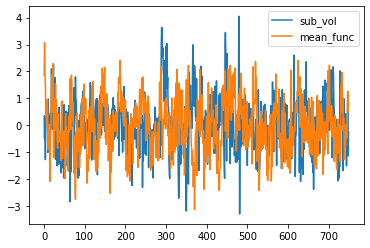

In [ ]:
print('sub size:', sub_vol.shape)
print('mean func size:', mean_func.shape)

plt.plot(sub_vol.get_data()[45,45,50,:], label='sub_vol')
plt.plot(mean_func.get_data()[45,45,50,:], label='mean_func')
plt.legend()

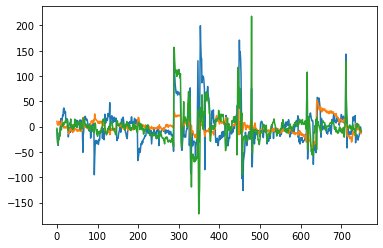

In [ ]:
plt.plot(lo_sub_pcs[:,0], label='lo_sub_pcs')
plt.plot(ffa_sub_pcs[:,0], label='ffa_sub_pcs')
plt.plot(a1_sub_pcs[:,0], label='a1_sub_pcs')

In [ ]:
'''mean to sub corrs'''
print('ffa a1 corr', np.corrcoef(ffa_sub_pcs[:,0], a1_avg_pcs[:,0]))
print('ffa lo corr', np.corrcoef(ffa_sub_pcs[:,0], lo_avg_pcs[:,0]))
print('a1 lo corr', np.corrcoef(a1_sub_pcs[:,0], lo_avg_pcs[:,0]))

ffa a1 corr [[1.         0.03906234]
 [0.03906234 1.        ]]
ffa lo corr [[1.         0.10960267]
 [0.10960267 1.        ]]
a1 lo corr [[ 1.         -0.07240852]
 [-0.07240852  1.        ]]


In [ ]:
''' roi to roi corrs'''
print('ffa a1 corr', np.corrcoef(ffa_sub_pcs[:,0], a1_sub_pcs[:,0]))
print('ffa lo corr', np.corrcoef(ffa_sub_pcs[:,0], lo_sub_pcs[:,0]))
print('a1 lo corr', np.corrcoef(a1_sub_pcs[:,0], lo_sub_pcs[:,0]))

print('ffa a1 corr', np.corrcoef(ffa_avg_pcs[:,0], a1_avg_pcs[:,0]))
print('ffa lo corr', np.corrcoef(ffa_avg_pcs[:,0], lo_avg_pcs[:,0]))
print('a1 lo corr', np.corrcoef(a1_avg_pcs[:,0], lo_avg_pcs[:,0]))

ffa a1 corr [[1.         0.31520827]
 [0.31520827 1.        ]]
ffa lo corr [[1.         0.16734564]
 [0.16734564 1.        ]]
a1 lo corr [[1.         0.55231715]
 [0.55231715 1.        ]]
ffa a1 corr [[ 1.         -0.37616657]
 [-0.37616657  1.        ]]
ffa lo corr [[1.         0.85822642]
 [0.85822642 1.        ]]
a1 lo corr [[ 1.         -0.37798169]
 [-0.37798169  1.        ]]


In [ ]:
"""try predicting individual voxels"""

"""fit pca/srm on train and transform test"""

"""multivariate global signal regression"""

"""take out 10s between movie splits"""

In [ ]:
whole_masker = maskers.NiftiMasker(mask_img=whole_brain_mask, detrend = True, standardize = True)
whole_masker.fit(bold_vol)
whole_ts = whole_masker.transform(bold_vol)
mean_ts = np.mean(whole_ts, axis=1)

In [ ]:
model_ts = np.load(f'{model_predictor}/cornet_z_sl_imagenet_noface_aIT_DM-clip_ts.npy')
adult_ts = np.transpose(np.load(f'{human_predictor}/srm_rLO_18_50.npy'))

bold_vol_clean = image.clean_img(bold_vol, confounds = mean_ts, detrend = True)

lo_masker = maskers.NiftiMasker(lo_roi, detrend=True, standardize=True)
lo_masker.fit(bold_vol_clean)
lo = lo_masker.transform(bold_vol)

a1_masker = maskers.NiftiMasker(a1_roi, detrend=True, standardize=True)
a1_masker.fit(bold_vol_clean)
a1 = a1_masker.transform(bold_vol)


In [ ]:
'''normalize and reduce dimensionality'''

model_ts= stats.zscore(model_ts, axis=0, ddof=1)
adult_ts= stats.zscore(adult_ts, axis=0, ddof=1)


lo_n = calc_pc_n(extract_pc(lo),.9) #determine number of PCs in train_data using threshold        

lo_pca = extract_pc(lo, lo_n) #conduct PCA one more time with that number of PCs
lo_comps = lo_pca.transform(lo) #transform train data in PCs       

a_n = calc_pc_n(extract_pc(a1),.9) #determine number of PCs in train_data using threshold
a1_pca = extract_pc(a1, a_n) #conduct PCA one more time with that number of PCs
a1_comps = a1_pca.transform(a1) #transform train data in PCs

_,lo_rdm_vox = create_rdm(lo)
_,lo_rdm_pc = create_rdm(lo_comps)

_, a1_rdm_vox = create_rdm(a1)
_, a1_rdm_pc = create_rdm(a1_comps)

_,model_rdm = create_rdm(model_ts)


In [ ]:
lo.shape

(168, 4142)

In [ ]:
print(lo.shape, a1.shape)
print(lo_comps.shape, a1_comps.shape)
#print(model_ts.shape)

(168, 4142) (168, 2067)
(168, 19) (168, 19)
(750, 70)


In [ ]:
lo_comps= stats.zscore(lo_comps, axis=0, ddof=1)
a1_comps= stats.zscore(a1_comps, axis=0, ddof=1)

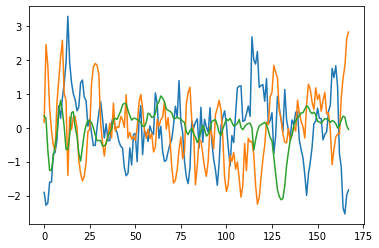

In [ ]:
plt.plot(lo_comps[:,0], label='lo_comps')
plt.plot(a1_comps[:,0], label='a1_comps')
plt.plot(mean_ts, label='mean_ts')

In [ ]:
print(np.corrcoef(lo_comps[:,0], a1_comps[:,0]))

[[1.         0.85614014]
 [0.85614014 1.        ]]


In [ ]:
'''correlate RDMs'''

print(np.corrcoef(lo_rdm_pc,lo_rdm_vox))
print(np.corrcoef(lo_rdm_vox, a1_rdm_vox))
print(np.corrcoef(lo_rdm_pc, a1_rdm_pc))

#print(np.corrcoef(lo_rdm_pc, model_rdm))

[[1.         0.53854045]
 [0.53854045 1.        ]]
[[1.         0.53467698]
 [0.53467698 1.        ]]
[[1.         0.64324863]
 [0.64324863 1.        ]]


array([[1.        , 0.57567739],
       [0.57567739, 1.        ]])

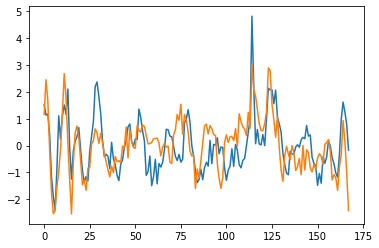

In [ ]:
plt.plot(lo_comps[:,1])
plt.plot(a1_comps[:,1])
np.corrcoef(lo_comps[:,1], a1_comps[:,1])

In [ ]:
np.corrcoef(a1_comps[:,0], mean_ts)

array([[1.        , 0.86469677],
       [0.86469677, 1.        ]])

In [ ]:
"""
Test model
"""

rois = ['random','imagenet_noface']
sub_comps = a1_comps
sub_pca = a1_pca
all_rois = []
for roi in rois:
    adult_ts = np.load(f'{model_predictor}/cornet_z_sl_{roi}_aIT_DM-clip_ts.npy')
    all_scores = []
    for kk in range(0,adult_ts.shape[1]):
        seed_ts = adult_ts[:,0:kk+1]
        
        curr_score = []
        for jj in range(0,sub_comps.shape[1]):
            
            mod = sm.OLS( sub_comps[:,0],seed_ts).fit()
            r_squared = mod.rsquared

            weighted_corr = r_squared * sub_pca.explained_variance_ratio_[jj]
            curr_score.append(weighted_corr)
        final_corr = np.sum(curr_score)/(np.sum(sub_pca.explained_variance_ratio_))
        all_scores.append(final_corr)
    all_rois.append(all_scores)

In [ ]:
"""
Test ROIs
"""

rois = ['rLO','lLO','lFFA','rFFA']
sub_comps = a1_comps
sub_pca = a1_pca
all_rois = []
for roi in rois:
    adult_ts = np.transpose(np.load(f'{human_predictor}/srm_{roi}_18_50.npy'))
    all_scores = []
    for kk in range(0,adult_ts.shape[1]):
        seed_ts = adult_ts[:,0:kk+1]
        
        curr_score = []
        for jj in range(0,sub_comps.shape[1]):
            
            mod = sm.OLS( sub_comps[:,0],seed_ts).fit()
            r_squared = mod.rsquared

            weighted_corr = r_squared * sub_pca.explained_variance_ratio_[jj]
            curr_score.append(weighted_corr)
        final_corr = np.sum(curr_score)/(np.sum(sub_pca.explained_variance_ratio_))
        all_scores.append(final_corr)
    all_rois.append(all_scores)

lo


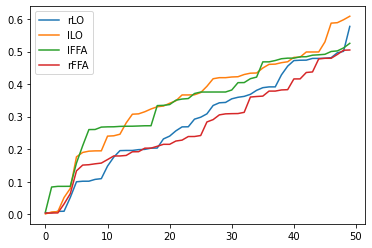

In [ ]:
print('lo')
lo_data = all_rois
for rr in range(0,len(rois)):
    plt.plot(lo_data[rr], label=rois[rr])
plt.legend(loc="upper left")


a1


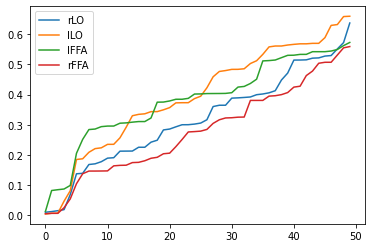

In [ ]:
print('a1')
a1_data = all_rois
for rr in range(0,len(rois)):
    plt.plot(a1_data[rr], label=rois[rr])
plt.legend(loc="upper left")


In [ ]:
sub_file = f'{subj_dir}/sub-NDAREG930XPP/sub-NDAREG930XPP_task-movieDM_bold.nii.gz'
bold_vol = image.load_img(sub_file) #load data
affine = bold_vol.affine #get affine

In [ ]:
test_slice = bold_vol.get_data()[:,:,0]
test_slice = nib.Nifti1Image(test_slice, affine)

In [ ]:
roi = f'{study_dir}/derivatives/rois/rA1.nii.gz'

In [ ]:
plotting.view_img(bold_vol)

DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

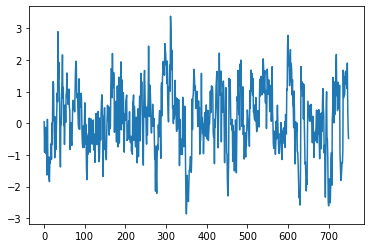

In [ ]:
plt.plot(sub_ts[:,0])

In [ ]:
np.corrcoef(a1[:,0],adult_ts[:,0])

array([[1.       , 0.0459994],
       [0.0459994, 1.       ]])

LinearRegression()

-0.4109339586423002

In [ ]:
mod = sm.OLS( a1[:,0], model_ts)

In [ ]:
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.356
Model:                            OLS   Adj. R-squared (uncentered):              0.291
Method:                 Least Squares   F-statistic:                              5.468
Date:                Mon, 04 Jul 2022   Prob (F-statistic):                    5.32e-33
Time:                        16:38:30   Log-Likelihood:                         -827.51
No. Observations:                 750   AIC:                                      1793.
Df Residuals:                     681   BIC:                                      2112.
Df Model:                          69                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0577      0.012     -4.880      0.000      -0.081      -0.034
x2             0.0022      0.015      0.151      0.880      -0.026       0.031
x3             0.0954      0.019      5.079      0.000       0.059       0.132
x4            -0.0343      0.019     -1.809      0.071      -0.071       0.003
x5             0.0292      0.021      1.403      0.161      -0.012       0.070
x6            -0.0336      0.021     -1.640      0.101      -0.074       0.007
x7             0.0298      0.022      1.345      0.179      -0.014       0.073
x8            -0.0043      0.022     -0.199      0.842      -0.047       0.038
x9             0.0313      0.023      1.358      0.175      -0.014       0.077
x10           -0.0293      0.023     -1.257      0.209      -0.075       0.016
x11           -0.0897      0.026     -3.392      0.001      -0.142      -0.038
x12           -0.1140      0.026     -4.370      0.000      -0.165      -0.063
x13            0.0162      0.025      0.639      0.523      -0.034       0.066
x14            0.1132      0.026      4.303      0.000       0.062       0.165
x15            0.0866      0.027      3.189      0.001       0.033       0.140
x16           -0.0235      0.025     -0.924      0.356      -0.074       0.026
x17            0.0540      0.026      2.065      0.039       0.003       0.105
x18           -0.0254      0.029     -0.885      0.376      -0.082       0.031
x19           -0.0388      0.028     -1.383      0.167      -0.094       0.016
x20            0.0876      0.029      3.027      0.003       0.031       0.144
x21           -0.0768      0.032     -2.412      0.016      -0.139      -0.014
x22            0.0187      0.031      0.602      0.547      -0.042       0.080
x23           -0.1050      0.031     -3.371      0.001      -0.166      -0.044
x24            0.0340      0.031      1.089      0.277      -0.027       0.095
x25           -0.0461      0.032     -1.430      0.153      -0.109       0.017
x26            0.0762      0.031      2.458      0.014       0.015       0.137
x27           -0.1358      0.033     -4.094      0.000      -0.201      -0.071
x28           -0.0391      0.032     -1.214      0.225      -0.102       0.024
x29           -0.0599      0.033     -1.804      0.072      -0.125       0.005
x30           -0.0334      0.032     -1.051      0.294      -0.096       0.029
x31           -0.0336      0.033     -1.009      0.314      -0.099       0.032
x32           -0.0299      0.033     -0.918      0.359      -0.094       0.034
x33           -0.0606      0.033     -1.814      0.070      -0.126       0.005
x34            0.1417      0.033      4.249      0.000       0.076       0.207
x35            0.0615      0.034      1.797      0.073      -